## 선형회귀

### K-최근접 이웃 회귀 문제점

- 기본데이터 : http://bit.ly/perch_data

In [1]:
import numpy as np

# 농어는 별론데
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

perch_length.shape

(56,)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- 분류는 입력이 (길이, 무게) 쌍. 타겟이 (도미, 빙어)
- 회귀는 입력 길이, 타겟 무게, 길이에 따른 무게를 예측

In [3]:
# 훈련세트, 테스트세트 분리
# X_train, y_train, X_target, y_target
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [4]:
# 값 입력시 2차원 배열이 되어야하기 때문에 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [5]:
# K-최근접 이웃 회귀
from sklearn.neighbors import KNeighborsRegressor


In [6]:
knr = KNeighborsRegressor(n_neighbors=3)
knr

KNeighborsRegressor(n_neighbors=3)

In [7]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [8]:
knr.predict([[50,]])
# 농어 길이가 50cm 라면 무게는 1033g이 예측된다.

array([1033.33333333])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc = {'axes.unicode_minus':False})

In [10]:
# 50cm 농어 최근접 이웃 구하기
pred_perch = [[80,]]
distances, indexes = knr.kneighbors(pred_perch)
pred_perch
knr.predict(pred_perch)

array([1033.33333333])

In [11]:
np.mean(train_target[indexes])

1033.3333333333333

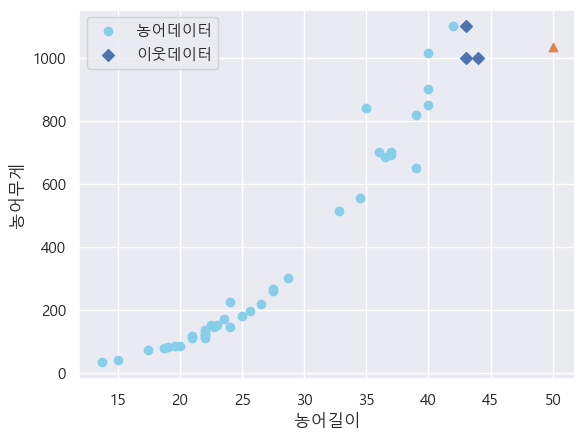

In [12]:
# 농어훈련세트 산점도 그리기
plt.Figure(figsize=(15,6))
plt.scatter(train_input,train_target, color='skyblue', label = '농어데이터')
# 훈련세트에서 최근접 이웃만 다시
plt.scatter(train_input[indexes],train_target[indexes], marker='D', label='이웃데이터')
plt.scatter(50,1033.3333, marker='^')

plt.xlabel('농어길이')
plt.ylabel('농어무게')
plt.legend()
plt.show()

### 선형회귀
- 대표적인 회귀 알고리즘
- 간단하고 성능이 뛰어남

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr

LinearRegression()

In [15]:
lr.fit(train_input, train_target)

LinearRegression()

In [16]:
lr.score(test_input,test_target)

0.824750312331356

In [17]:
lr.predict([[50,]])

array([1241.83860323])

In [18]:
# 선형회귀 직선 방정식 확인
print(lr.coef_,lr.intercept_)   # coef_ 기울기 , # intercept y절편  // 이거 방정식이노

[39.01714496] -709.0186449535474


- 농어무게 = aX + b
- a = 39.01714496
- b = -709.018644

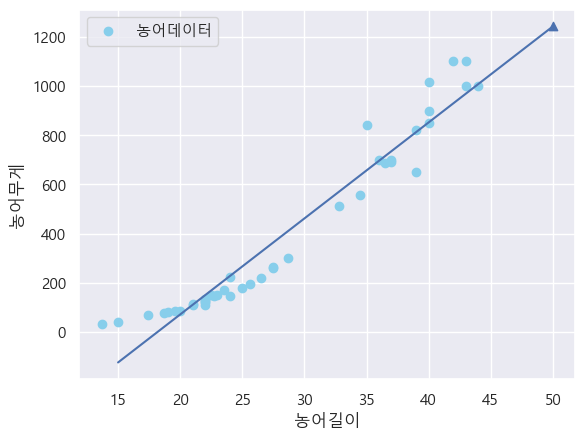

In [19]:
# 농어훈련세트 산점도 그리기
plt.Figure(figsize=(15,6))
plt.scatter(train_input,train_target, color='skyblue', label = '농어데이터')
# 선형회귀 직선 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.838, marker='^')

plt.xlabel('농어길이')
plt.ylabel('농어무게')
plt.legend()
plt.show()

In [20]:
lr.score(train_input,train_target)

0.9398463339976041

In [21]:
lr.score(test_input,test_target)

0.824750312331356

In [22]:
lr.predict([[10,]])

array([-318.84719532])

### 다항회귀
- 2차 방정식이 되어야 하기 때문

In [23]:
train_poly = np.column_stack((train_input **2 , train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
train_poly

In [25]:
lr2 = LinearRegression()
lr2

LinearRegression()

In [26]:

lr2.fit(train_poly, train_target)

LinearRegression()

In [28]:
print(lr2.coef_,lr2.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


- 길이의 제곱에 들어갈 기울기 - 1.01433211
- 길이에 들어갈 인수 - -21.55792498
- 절편 - 116.0502107827827

In [29]:
lr2.predict([[50**2, 50]])

array([1573.98423528])

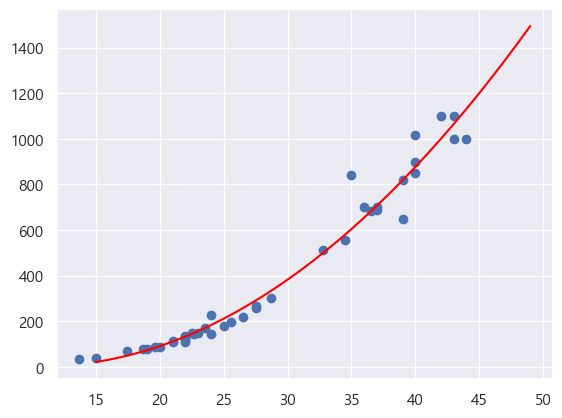

In [33]:
point = np.arange(15,50)
plt.Figure(figsize=(10,6))
plt.scatter(train_input, train_target)
plt.plot(point, (1.01433211 * (point ** 2) + (-21.55792498 * point) + 116.0502107827827), color='red')

#### 결론
- 직선 선형회귀
    - 훈련세트의 정확도 : 93.9%
    - 테스트세트 정확도 : 82.5%
- 다항회귀
    - 훈련세트 정확도 : 97.1%
    - 테스트세트 정확도 : 97.8%

- `선형회귀`는 특성(입력), 타겟 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는 것
    - 특성이 하나면 직선(단항) 방정식이 생성

- 선형방적의 `계수(기울기/가중치)`와 `절편`이 저장
- 다항회귀는 다항 방정식으로 특성과 타겟의 관계를 나타냄
- 선형회귀 - 가장 단순하고 정확도가 높음, 제일 많이 사용되고있음